In [ ]:
import tensorflow as tf
import numpy as np

path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/SiiHyunn/DipLearning_2021/main/test.txt')

16384/588 [===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [ ]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

print(test_text)

첫눈이 오는걸 보고있으니까 기분이 몽글몽글하네요. 모두들 따뜻하게 입었으면 좋겠습니다. 길가에 있는 고양이도 행복했으면 좋겠습니다.	1
좋아하는 발라드가수의 신곡을 들어봤습니다. 예전 앨범과 달리 멜로디라인이 마음에 안들었습니다. 긴 공백기에 비해 부족한 앨범이였습니다.	0
오늘 쌀국수를 먹었습니다. 대기줄이 길어서 힘들었습니다. 하지만 먹고나니까 기다린 시간이 아깝지않았습니다. 힘줄 쌀국수를 꼭 먹어보셔야합니다.	1



In [ ]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[1])] for row in test_text.split('\n')[0:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(test_Y)

(150000, 1) (3, 1)
[[1]
 [0]
 [1]]


In [ ]:
import re

def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
sentences = [sentence.split(' ') for sentence in train_text_X]
test_text_X = [row.split('\t')[0] for row in test_text.split('\n')[0:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
test_sentences = [sentence.split(' ') for sentence in test_text_X]

for i in range(3):
    test_sentences[i].pop() #뒤에 공백 제거
    print(test_sentences[i])

['첫눈이', '오는걸', '보고있으니까', '기분이', '몽글몽글하네요', '모두들', '따뜻하게', '입었으면', '좋겠습니다', '길가에', '있는', '고양이도', '행복했으면', '좋겠습니다']
['좋아하는', '발라드가수의', '신곡을', '들어봤습니다', '예전', '앨범과', '달리', '멜로디라인이', '마음에', '안들었습니다', '긴', '공백기에', '비해', '부족한', '앨범이였습니다']
['오늘', '쌀국수를', '먹었습니다', '대기줄이', '길어서', '힘들었습니다', '하지만', '먹고나니까', '기다린', '시간이', '아깝지않았습니다', '힘줄', '쌀국수를', '꼭', '먹어보셔야합니다']


In [ ]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_sentences_new = []
for sentence in test_sentences:
    test_sentences_new.append([word[:5] for word in sentence][:25])
test_sentences = test_sentences_new

for i in range(3):
    print(test_sentences[i])

['첫눈이', '오는걸', '보고있으니', '기분이', '몽글몽글하', '모두들', '따뜻하게', '입었으면', '좋겠습니다', '길가에', '있는', '고양이도', '행복했으면', '좋겠습니다']
['좋아하는', '발라드가수', '신곡을', '들어봤습니', '예전', '앨범과', '달리', '멜로디라인', '마음에', '안들었습니', '긴', '공백기에', '비해', '부족한', '앨범이였습']
['오늘', '쌀국수를', '먹었습니다', '대기줄이', '길어서', '힘들었습니', '하지만', '먹고나니까', '기다린', '시간이', '아깝지않았', '힘줄', '쌀국수를', '꼭', '먹어보셔야']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)

train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

test_X = tokenizer.texts_to_sequences(test_sentences)
test_X = pad_sequences(test_X,padding='post', maxlen=25)

print(test_X[:3])

[[  891  5505  4454  2268    41 19663  2268     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  193  1638  2065   383  1021   403   727     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  310  8391    68 12066   150    61     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 25, 300)           6000000   
                                                                 
 lstm_6 (LSTM)               (None, 50)                70200     
                                                                 
 dense_6 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 17s 16ms/step - loss: 0.4352 - accuracy: 0.7828 - val_loss: 0.3833 - val_accuracy: 0.8198
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3256 - accuracy: 0.8480 - val_loss: 0.3889 - val_accuracy: 0.8165
Epoch 3/5
938/938 [===

In [ ]:
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 25ms/step - loss: 0.0129 - accuracy: 1.0000


[0.0128615228459239, 1.0]

In [ ]:
print(tokenizer.index_word[891])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

기분이
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [ ]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.44421503 0.55578494]
['재미있을', '줄']
[0.44285986 0.5571402 ]
['재미있을', '줄', '알았는데']
[0.49538654 0.50461346]
['재미있을', '줄', '알았는데', '완전']
[0.47859922 0.52140075]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.47859922 0.52140075]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.663353   0.33664694]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.99119943 0.00880056]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.99872786 0.00127214]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.99872786 0.00127214]


In [ ]:
!pip install kaggle

In [ ]:
!unzip train.zip -d /content/train/

Archive:  train.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of train.zip or
        train.zip.zip, and cannot find train.zip.ZIP, period.


In [ ]:
import pandas as pd
label_text = pd.read_csv('labels.csv')
print(label_text.head())
label_text.info()

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
label_text['breed'].nunique()

120

FileNotFoundError: ignored

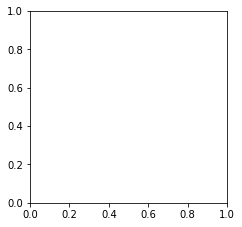

In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for c in range(9):
  image_id = label_text.loc[c, 'id']
  plt.subplot(3, 3, c+1)
  plt.imshow(plt.imread('/content/train/' + image_id + '.jpg'))
  plt.title(str(c) + ', ' + label_text.loc[c, 'breed'])
  plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

for layer in mobilev2.layers[:-1]:
  layer.trainable = True

for layer in mobilev2.layers[:-1]:
  if 'kernel' in layer.__dict__:
    kernel_shape = np.array(layer.get_weights()).shape
    layer.set_weights(tf.random.normal(kernel_shape, 0, 1))

In [ ]:
import os
import shutil

os.mkdir('/content/train_sub')

for i in range(len(label_text)):
    if os.path.exists('/content/train_sub/' + label_text.loc[i]['breed']) == False:
        os.mkdir('/content/train_sub/' + label_text.loc[i]['breed'])
    shutil.copy('/content/train/' + label_text.loc[i]['id'] + '.jpg', '/content/train_sub/' + label_text.loc[i]['breed'])

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import preprocess_input

image_size = 299
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255., horizontal_flip=True, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.25)
valid_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = train_datagen.flow_from_directory(directory="/content/train_sub/", subset="training", batch_size=batch_size, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))
valid_generator = valid_datagen.flow_from_directory(directory="/content/train_sub/", subset="validation", batch_size=1, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))

Found 7718 images belonging to 120 classes.
Found 2504 images belonging to 120 classes.


In [ ]:
unique_Y = label_text['breed'].unique().tolist()
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]
train_Y = np.array(train_Y)

print(train_Y[:10])
print(train_Y[-10:])

[0 1 2 3 4 5 5 6 7 8]
[34 87 91 63 48  6 93 63 77 92]


In [ ]:
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

steps_per_epoch = int(7718/32)
history = model.fit(train_generator, validation_data=valid_generator, epochs=10, steps_per_epoch=steps_per_epoch)

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

for layer in model.layers[:-20]:
    layer.trainable = False
for layer in model.layers[-20:]:
    layer.trainable = True

# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # 라벨이 원-핫 인코딩을 사용하기 때문에 sparse가 아닌 categorical_crossentropy를 사용합니다.
model.summary()

steps_per_epoch = int(7718/32)
history = model.fit_generator(train_generator, validation_data=valid_generator,epochs=10, steps_per_epoch=steps_per_epoch)

In [ ]:
all_image_path = ['/content/sample/1.PNG',
                  '/content/sample/2.PNG',
                  '/content/sample/3.PNG',
                  '/content/sample/4.PNG',
                  '/content/sample/5.PNG',]

In [ ]:
import cv2
import random
plt.figure(figsize=(16,16))
  
for c in range(5):
    image_path = all_image_path[c]
    
    plt.subplot(5,2,c*2+1)
    plt.imshow(plt.imread(image_path))
    real_y = image_path.split('/')[3]
    plt.title(real_y)
    plt.axis('off')
    idx = unique_sorted_Y.index(real_y)
    
    plt.subplot(5,2,c*2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(299, 299))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    feature_vector = feature_model.predict(img)
    
    prediction = model.predict(feature_vector)[0]
    
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [unique_sorted_Y[index] for index in top_5_predict]
    color = ['gray'] * 5
    if idx in top_5_predict:
        color[top_5_predict.tolist().index(idx)] = 'green'
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])